# Final Project: Cocktails

In [1]:
library(tidyverse)
library(patchwork)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
cocktails <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-26/cocktails.csv', col_types = cols())
boston_cocktails <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-26/boston_cocktails.csv', col_types = cols())

#cocktails  %>%  head

#boston_cocktails  %>% head

# Where the Data is from
The Mr Boston dataset was acquired from the Mr. Boston Bartender's Guide, while the cocktails.csv dataset was web-scraped as part of a hackathon. I found both of these from the Tidy Tuesday project, but I will be focusing on comparing the two, and then looking at the overall cocktails.csv data 

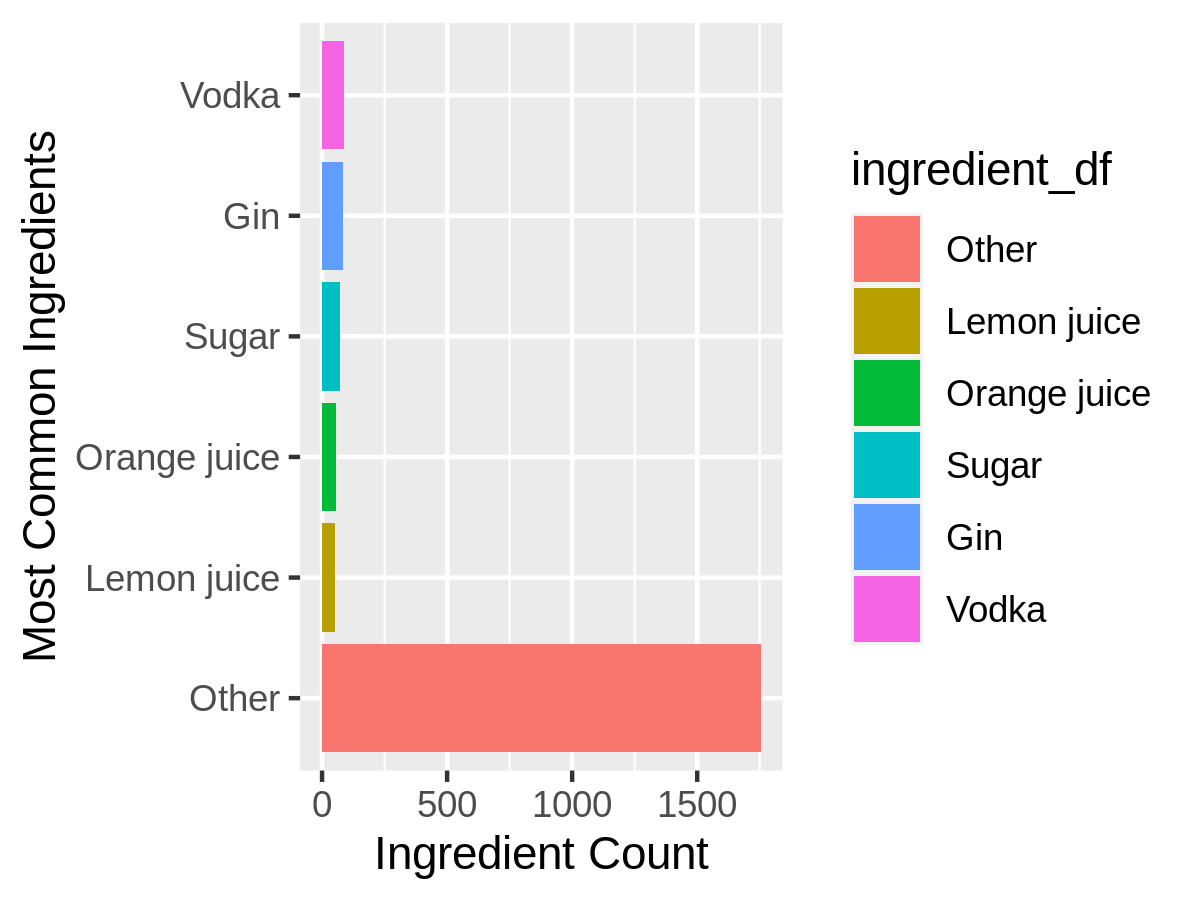

In [3]:
#The overall chart for most common ingredients

options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)
df_overall = cocktails  %>% 
    filter(!is.na(ingredient))  %>% 
    mutate(ingredient_df = fct_lump(ingredient, n = 5)  %>% 
    fct_infreq()  %>% 
    fct_rev() %>% 
    fct_relevel("Other"))

p = ggplot(df_overall, aes(y = ingredient_df, fill = ingredient_df)) + 
    labs( x = "Ingredient Count", y = "Most Common Ingredients")

p = p + geom_bar()

p = p + scale_color_brewer(palette = "Set2")

p

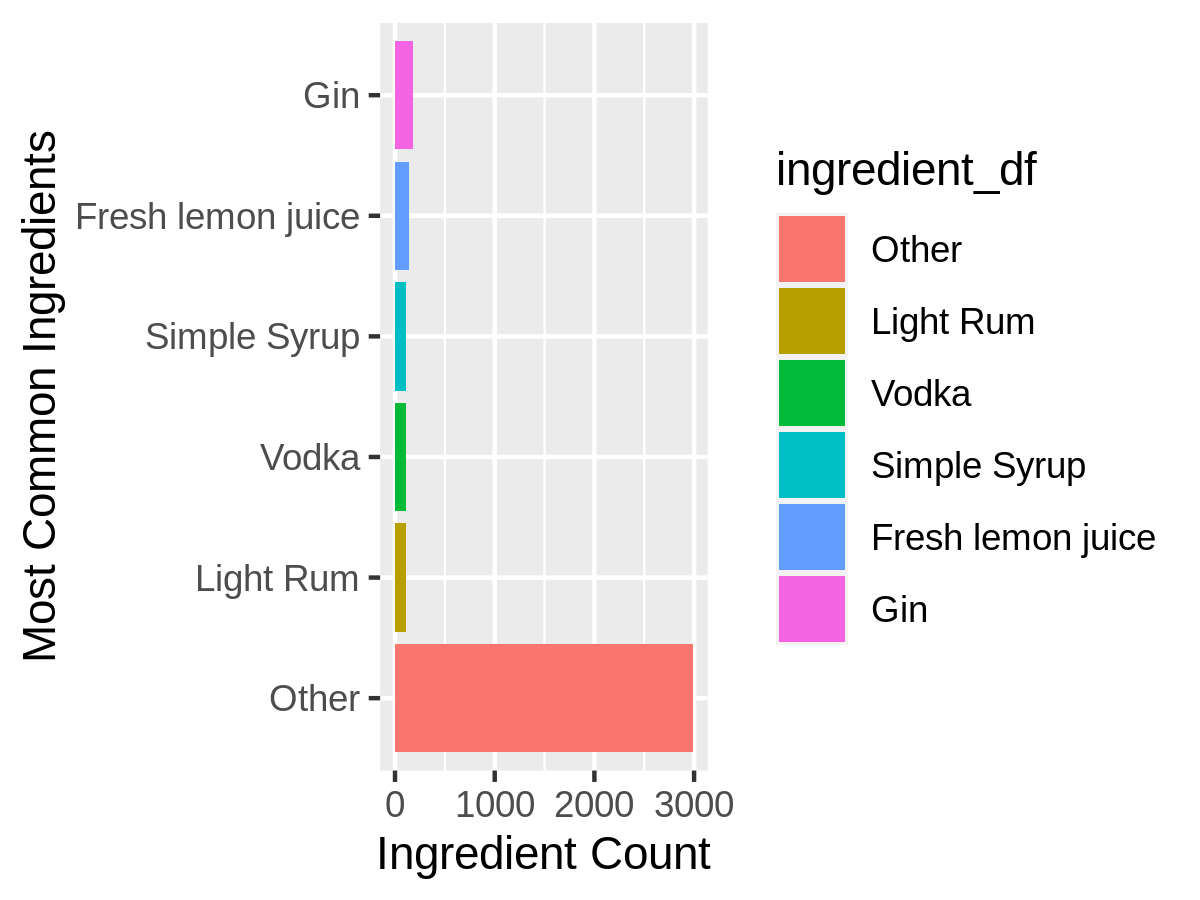

In [4]:
#The Boston chart for most used ingredients

options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)
df_boston = boston_cocktails  %>% 
    filter(!is.na(ingredient))  %>% 
    mutate(ingredient_df = fct_lump(ingredient, n = 5)  %>% 
    fct_infreq()  %>% 
    fct_rev() %>% 
    fct_relevel("Other"))

p2 = ggplot(df_boston, aes(y = ingredient_df, fill = ingredient_df)) +
     labs( x = "Ingredient Count", y = "Most Common Ingredients")
p2 = p2 + geom_bar()

p2 = p2 + scale_color_brewer(palette = "Set1")

p2

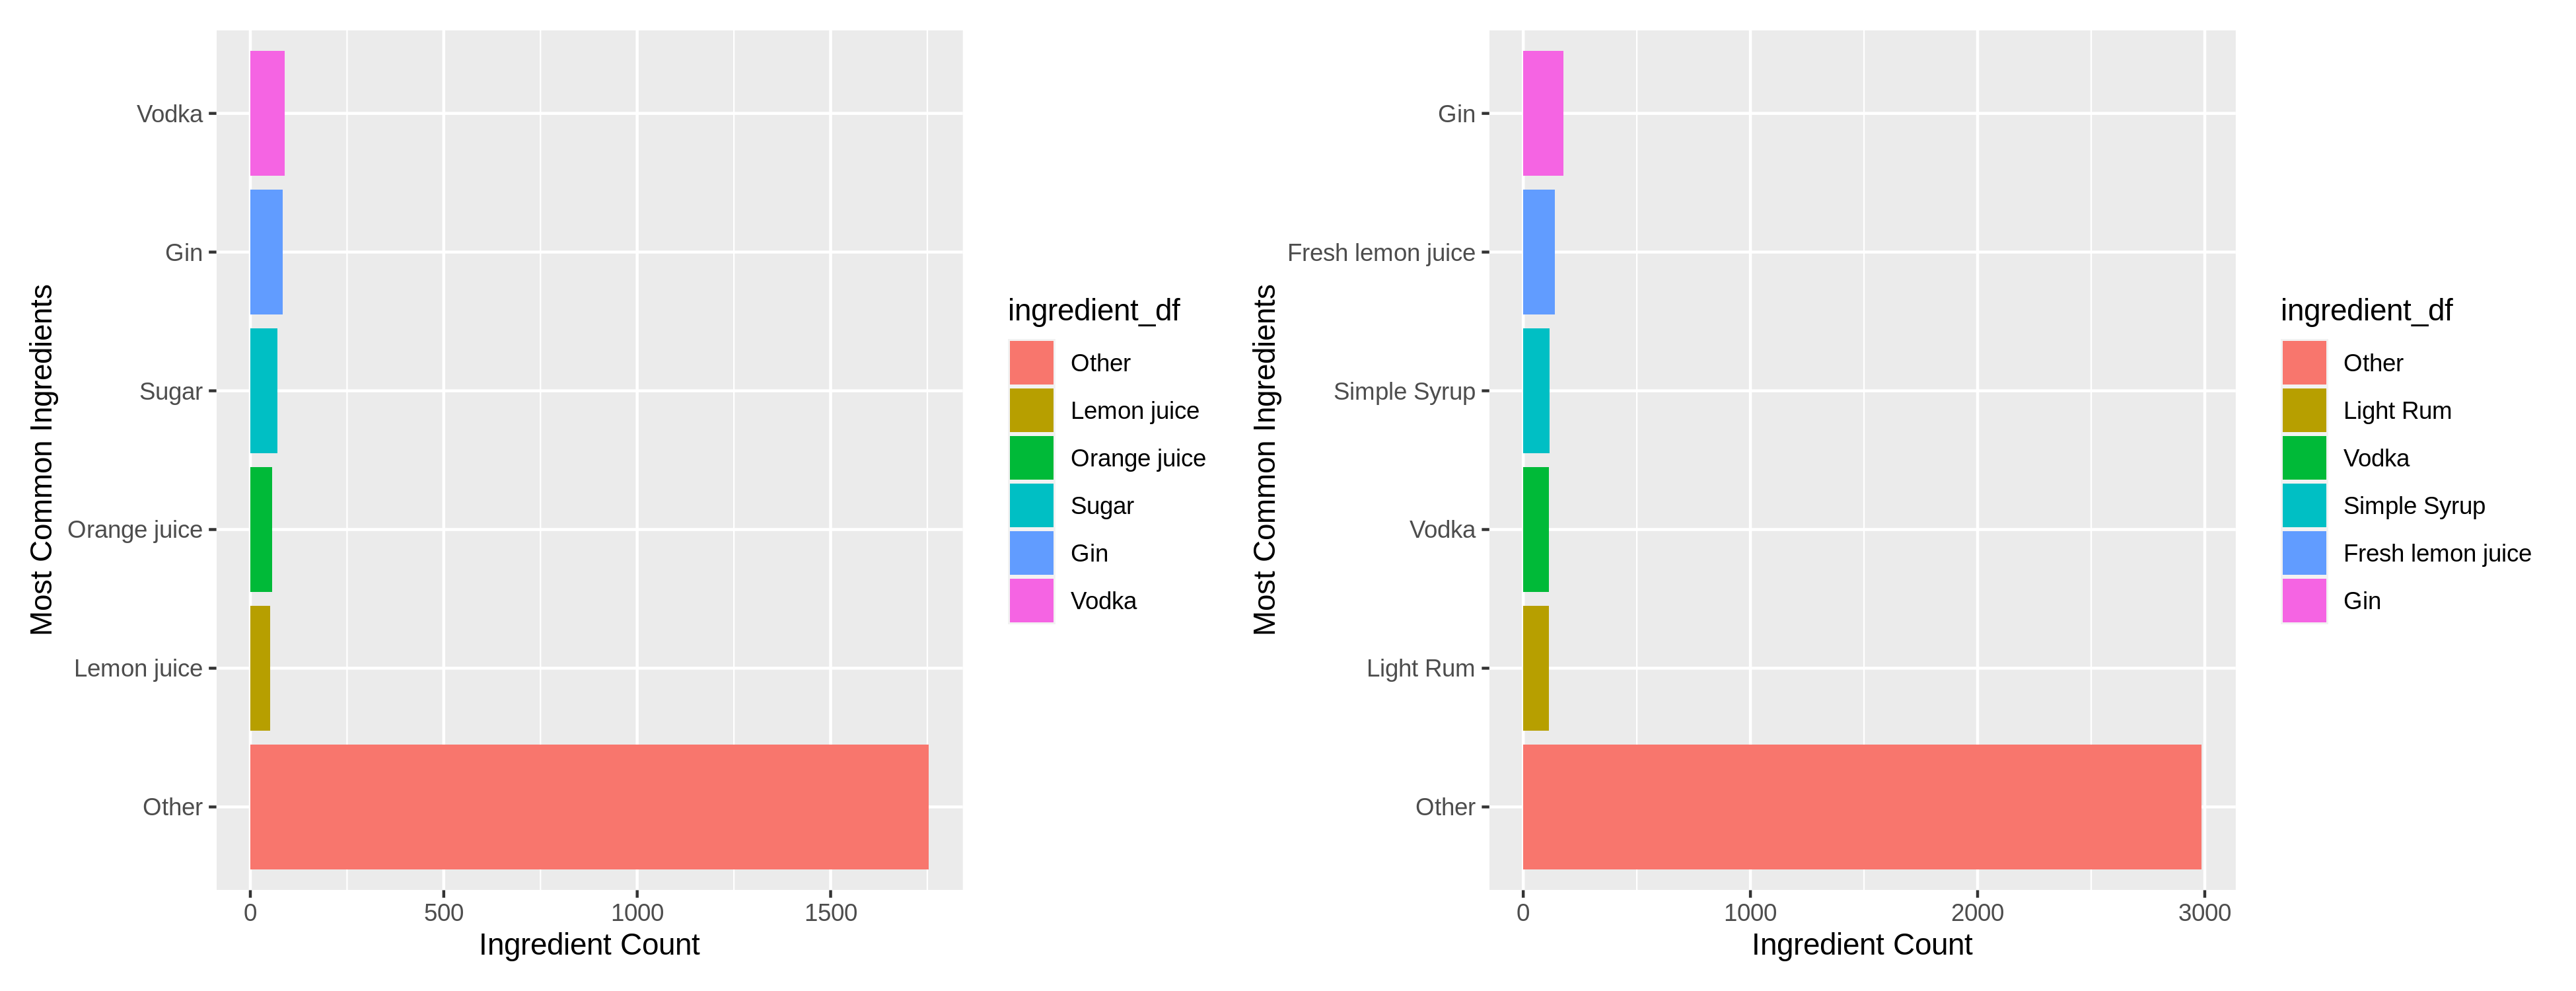

In [5]:
#combining these two charts for analyzing
options(repr.plot.width=13, repr.plot.height=5, repr.plot.res = 300)

p + p2

# Understanding this Chart

When looking at these charts, we are able to compare the most common ingredients used in cocktails between the location of Boston and then generic locations.We see that overall between the two charts that Vodka and Gin are both used in cocktails recorded in Boston and generic locations. This makes since considering this is recording cocktail recipes. It is interesting to note that Vodka falls lower on the most used ingredients on overall recipes than it does on Boston. The simple syrup and sugar on the two charts are comparable, and so are the fresh lemon juice and lemon juice. Overall, the most used ingredients are very similar, and this makes sense since they are both concerned with making cocktails, and most cocktails require similar ingredients, no matter the location.

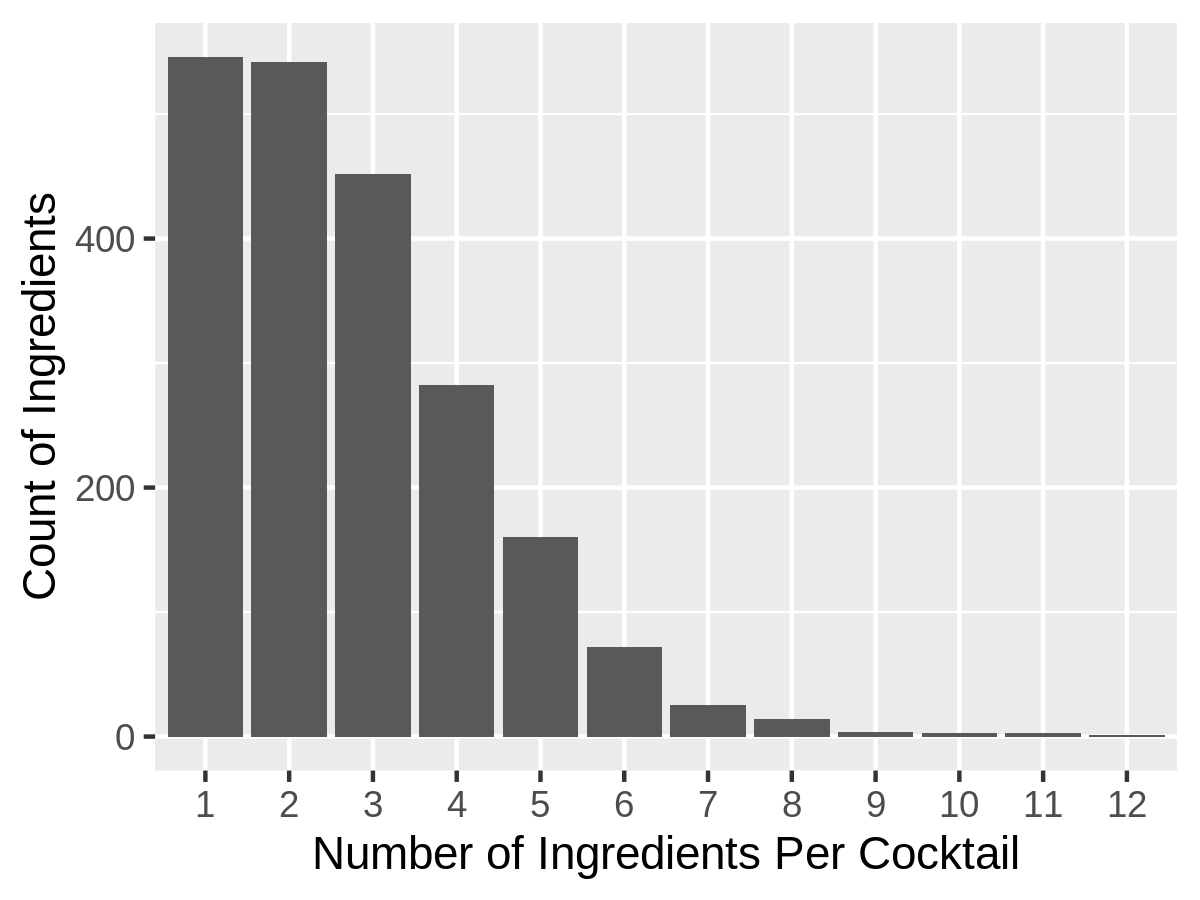

In [6]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

#Creating input dataset from coktail information 
ingred_num_char = cocktails  %>% 
    summarize(ingred_number = as.character(ingredient_number))

df_ing_num_col = ingred_num_char  %>% 
    filter(!is.na(ingred_number))  %>% 
    mutate(ing_name = fct_infreq(ingred_number))



p = ggplot(df_ing_num_col, aes(x = ing_name)) + labs(x = "Number of Ingredients Per Cocktail",
                                                    y = "Count of Ingredients")

p = p + geom_bar()

p


#This tibble allows for actual values of the chart to be seen
#ingred_num_char  %>% 
    #filter(!is.na(ingred_number))  %>% 
    #mutate(ing_name = fct_infreq(ingred_number))  %>% 
    #count(ingred_number)  %>% 
    #print



# Ingredient Number
This graph shows the number of ingredients per cocktail. Each drink is built ingredient by ingredient in the dataset, so because the count of "1" is 546, this means there are 546 drinks classified in the dataset. This is because each drink requires at least 1 ingredient. This is a visualization of the how the drinks difficulty drops off rapidly in the number of ingredients that are required for a cocktail. From this we are also able to see similar drops between 3-5, which means that comparable numbers of drinks are made with each of these numbers of ingredients. There are 170 drinks that are made with 3 ingredients in this dataset, 122 drinks made with 4 ingredients, and 88 drinks made with 5. We are able to see this from taking the difference between the column with the number of ingredients we are hoping to find in the drink minus the next column to the right. To see where these values came from in more detail, the code from the tibble can be uncommented.

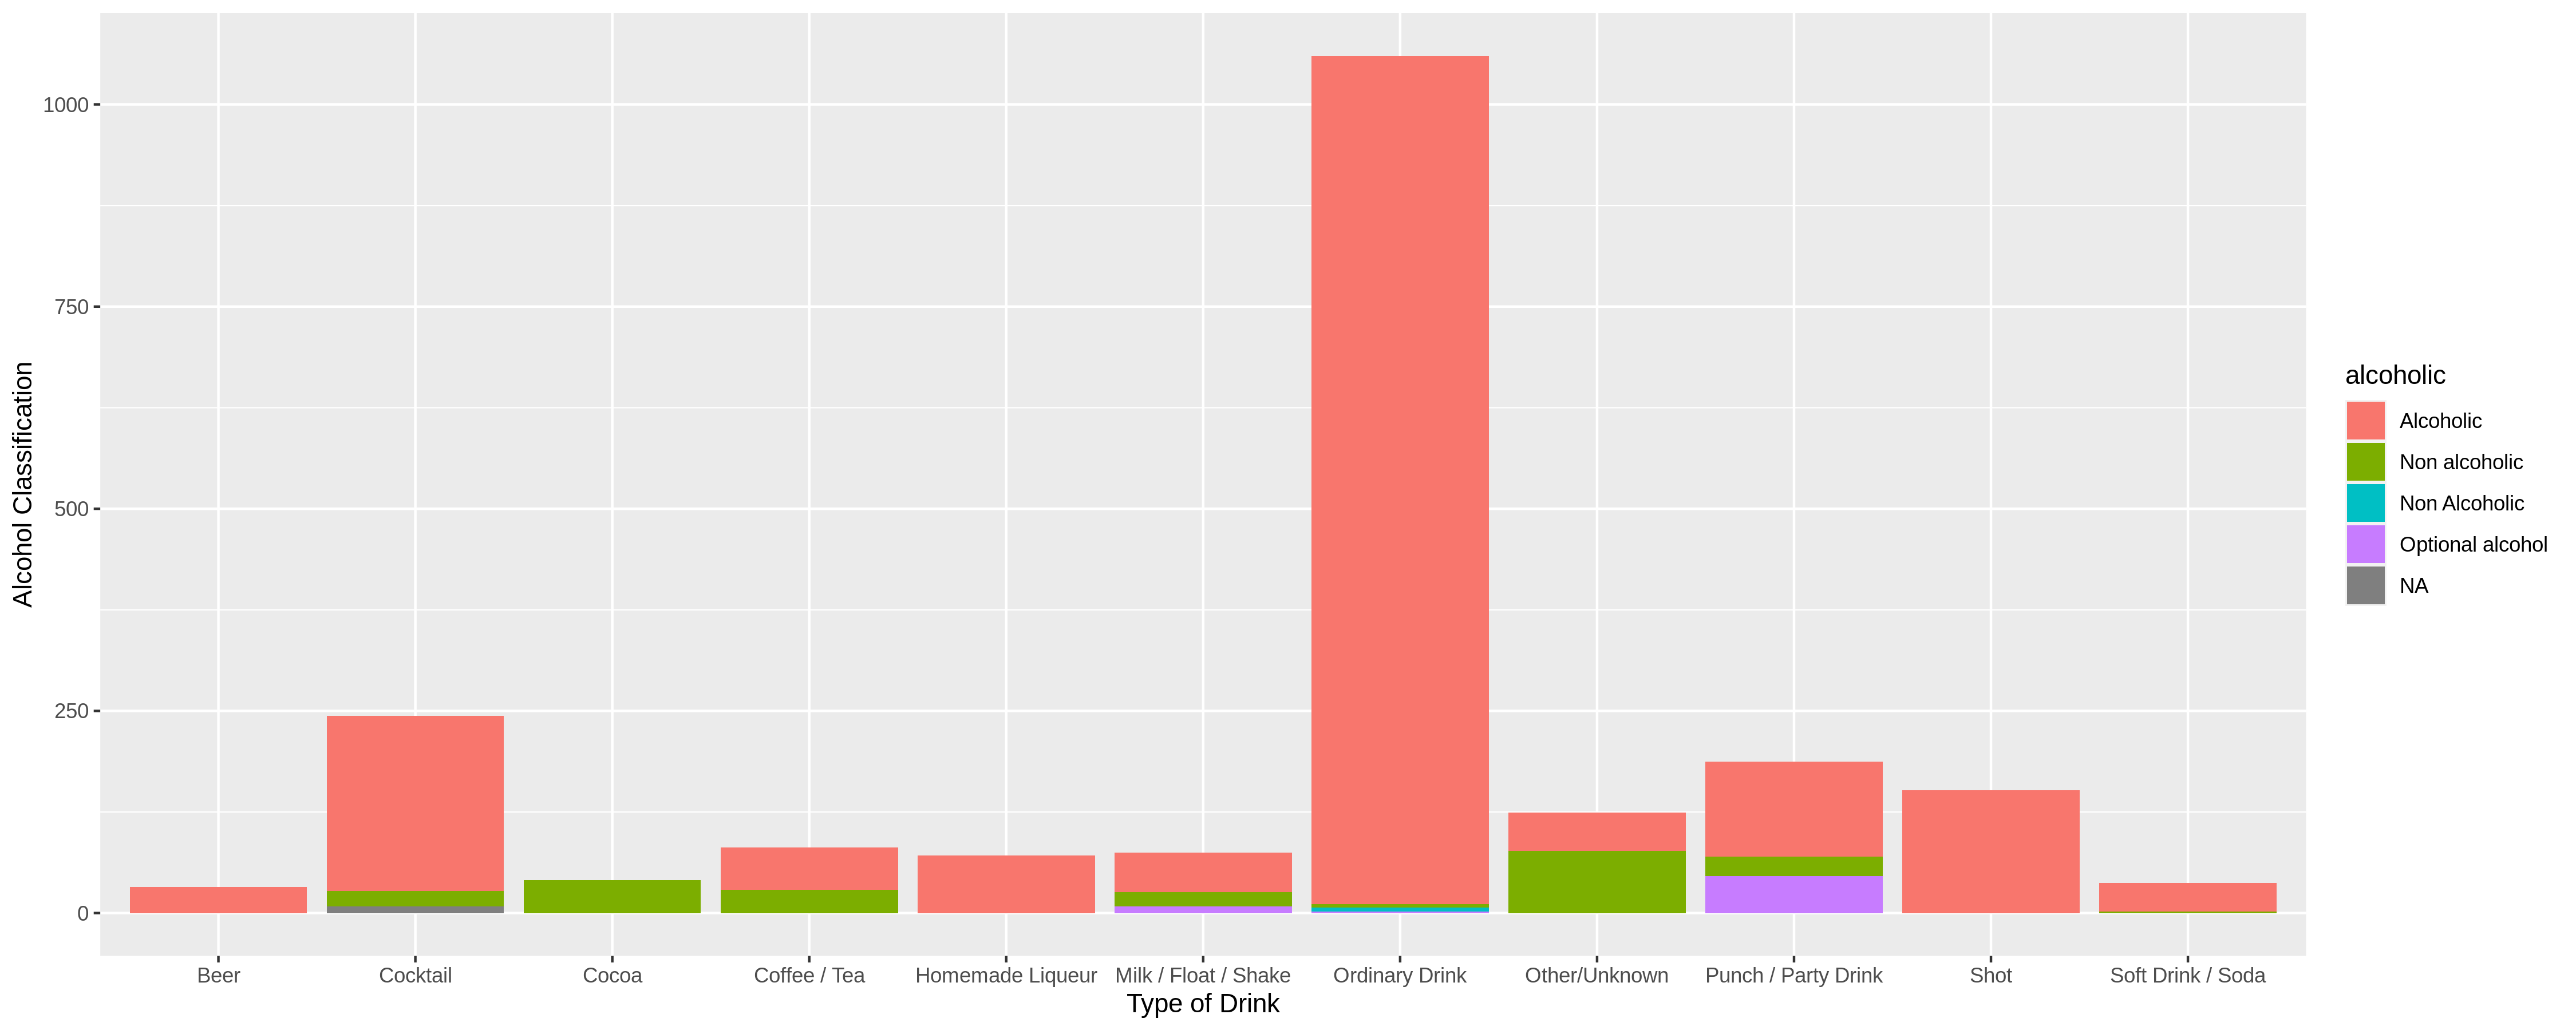

In [7]:
options(repr.plot.width=15, repr.plot.height=6, repr.plot.res = 300)


p = ggplot(cocktails, aes(x = category, fill = alcoholic)) + labs(
    x = 'Type of Drink', y = "Alcohol Classification")

p = p + geom_bar()

p = p + scale_color_brewer(palette = "Set2")

p

# Type of Drink by Alcoholic Classification

This graph shows what kind of drinks are found at bars typically, along with whether or not they are served with alcohol or not. This allows the viewer to be able to visualize what a bar would typically offer as an alcoholic drink and what could be considered clear of alcohol 

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 